# Notebook: Data generator


This notebook generate the data that will be used for all models.

## Some functions

In [1]:
import numpy as np
import torch as th
import time
from scipy import stats
from KS import KS
import matplotlib.pyplot as plt
from sklearn import preprocessing
from numpy import savetxt

In [2]:
def generatingdata(state_initial, length,sample_points,dt,final_time):
    """
    This function will generate data from the KS.py simulation
    
    input:
    - state_initial: the initial/current state of the system
    - length: the "physical" length of the domaine. 
              pay attention cuz this value will determine if the system is regular or chaotic
    - sample_points: the number of sample points on this length. It will be the size of the input in our system
    - dt: the time step of the simulation
    - final_time: the total time of simulation
    in this way, the number of iteraction of the simulation will final_time/dt
    
    
    output:
    - return: state_history, time_counter, position_x
    - print: state_history.shape et final_time
    
    state_history: all the spatialtemporal evolution of the system. shape: [number of iteractions,samples_points]
    time_counter: array of the time corresponding to each interaction
    position_x: array of samples_points points that goes from 0 to length
    
    """
    ks = KS(L=length,N=sample_points,dt=dt) #class of the simulation
    total_iteractions = int(np.round(final_time/dt))
    print("Running for : ",final_time, 'seconds', 'with', total_iteractions, 'iteractions')
    time_counter = 0 
    action = np.zeros(1) # in this simulation, we will set actions=0
    state_history = np.matrix(state_initial) # We will stack in state_history at each time step
    
    current_state = state_initial
    for nt in range(total_iteractions): 
        current_state = ks.advance(current_state,action)
        state_history = np.vstack((state_history,current_state))
        time_counter = np.hstack((time_counter,(nt+1)*ks.dt))
        if nt==100:
          print('100th iteraction: ok')
        if nt==1000:
          print('1000th iteraction: ok')
        if nt==2500:
          print('2500th iteraction: ok')
        if nt==5000:
          print('5000th iteraction: ok')
        if nt==10000:
          print('10000th iteraction: ok')
        if nt==50000:
          print('50000th iteraction: ok')
        if nt==75000:
          print('75000th iteraction: ok')
        if nt==100000:
          print('100000th iteraction: ok')
    
    position_x=ks.x
    # Explore the results 
    print('The state_history shape is:', state_history.shape)
    print('The final time:', time_counter[-1])
    
    return state_history, time_counter, position_x

In [3]:
def drawKS(U_sim, x_axis, t_axis ,startT=0,endT=0, width = 10, divwidth = 4): 
    """
    This function will plot the evolution of the KS system (U_sim) over time (t_axis)
    
    """
    fig = plt.figure(figsize=(width, width/divwidth))
    ax = fig.gca()
    ola = ax.contourf(t_axis[startT:endT], x_axis, U_sim[startT:endT,:].T, 15)
    cbar = plt.colorbar(ola)
    plt.xlabel('Time evolution')
    plt.ylabel('Position X')
    plt.title('Spatiotemporal solution of KS equation')
    plt.show()

In [4]:
def plothist(state_history,bins=30):
    """
    plot the histogram of KS system data with the correct label
    
    """
    fig, ax = plt.subplots(figsize=(12, 5))
    plt.hist(state_history,bins=30)
    plt.xlabel('Values of velocity')
    plt.ylabel('Frequency')
    plt.title('Histogram of state_history')
    plt.grid(True, color="#93a1a1", alpha=0.3)

In [5]:
def statvalues(state_history):
    """
    print some statistics values of the KS data
    
    """
    print('Mean:', np.mean(state_history))
    print('Median:', np.median(state_history))
    print('Max:', np.max(state_history))
    print('Min:', np.min(state_history))
    print('Mode:', stats.mode(state_history))
    print('Variance:', np.var(state_history))


In [6]:
def evolutionstat(state_history):
  """
  plot the temporal evolution of some statistics values
  
  """  
  plt.subplots(figsize=(15, 7))
  plt.subplot(2,3,1)
  plt.plot(np.mean(state_history,axis=1))
  plt.title('Mean')
  plt.ylabel('Mean value')
  plt.subplot(2,3,2)
  plt.plot(np.median(state_history,axis=1))
  plt.title('Median')
  plt.ylabel('Median value')
  plt.subplot(2,3,3)
  plt.plot(np.max(state_history,axis=1))
  plt.title('Max')
  plt.ylabel('Max value')
  plt.xlabel('Time evolution')
  plt.subplot(2,3,4)
  plt.plot(np.min(state_history,axis=1))
  plt.title('Min')
  plt.ylabel('Min value')
  plt.xlabel('Time evolution')
  plt.subplot(2,3,5)
  plt.plot(np.var(state_history,axis=1))
  plt.title('Variance')
  plt.ylabel('Variance value')
  plt.xlabel('Time evolution')

## Data generation

Set the main paramaters of the simulation

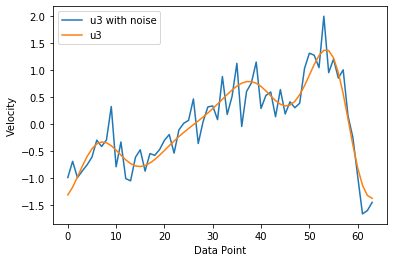

In [54]:
final_time = 10000 # the total time of the simulation
dt = 0.05 # the time step 
length = 22 # the "physical" length of the domaine. pay attention cuz this value will determine if the system is regular or chaotic
sample_points = 64 # the number of sample points on this length. It will be the size of the input in our system

#state_initial = np.loadtxt('u3.dat')
noise = np.random.normal(0, .3, state_initial.shape)
state_initial_noise = state_initial + noise

plt.plot(state_initial_noise, label='u3 with noise')
plt.plot(state_initial, label='u3')
plt.xlabel('Data Point')
plt.ylabel('Velocity')
plt.legend()

Generating and saving the data:

In [55]:
#to generate data

state_history, time_counter, position_x = generatingdata(state_initial_noise, length,sample_points,dt,final_time)

#to save the generated data
# save to csv file
savetxt('state_history_3_u3.dat', state_history)
savetxt('time_counter_3_u3.dat', time_counter)
savetxt('position_3_u3.dat', position_x)

Running for :  10000 seconds with 200000 iteractions
100th iteraction: ok
1000th iteraction: ok
2500th iteraction: ok
5000th iteraction: ok
10000th iteraction: ok
50000th iteraction: ok
75000th iteraction: ok
100000th iteraction: ok
The state_history shape is: (200001, 64)
The final time: 10000.0


In [35]:
cd ..

C:\Users\Callado\Documents\GitHub\Research-internship\Simulators\ks-simulator


In [36]:
cd ../ks-simulator/dataset2_u4/

C:\Users\Callado\Documents\GitHub\Research-internship\Simulators\ks-simulator\dataset2_u4


In [37]:
#to load data

from numpy import load
# load numpy array
state_history = np.loadtxt('state_history_2_u4.dat')
time_counter = np.loadtxt('time_counter_2_u4.dat')
position_x = np.loadtxt('position_2_u4.dat')

print('The state_history shape is:', state_history.shape)
print('The final time:', time_counter[-1])
print('Total length', position_x[1]+position_x[-1])

The state_history shape is: (200001, 64)
The final time: 10000.0
Total length 22.0


## Exploring the data
Let's take a look at the generated data:

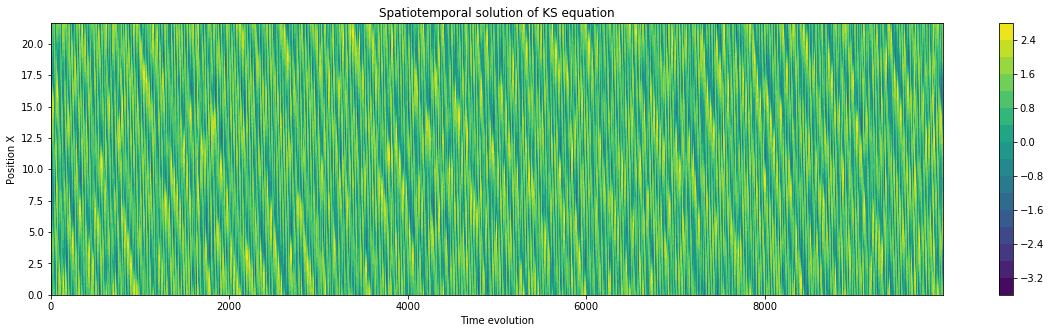

Mean: -0.3777951739993438
Median: -0.9772730272231885
Max: 1.071466742548953
Min: -1.1269933032864694
Mode: ModeResult(mode=array([-1.1269933]), count=array([1]))
Variance: 0.8746832926116925


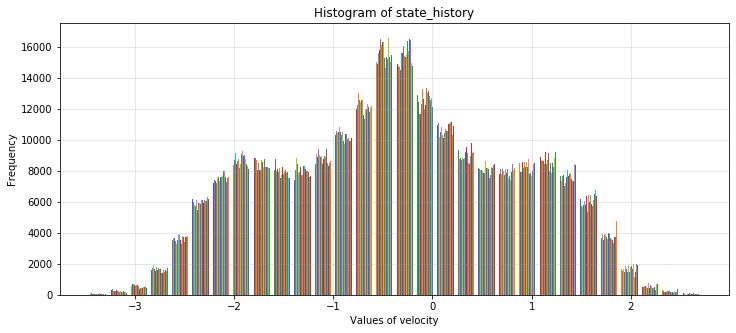

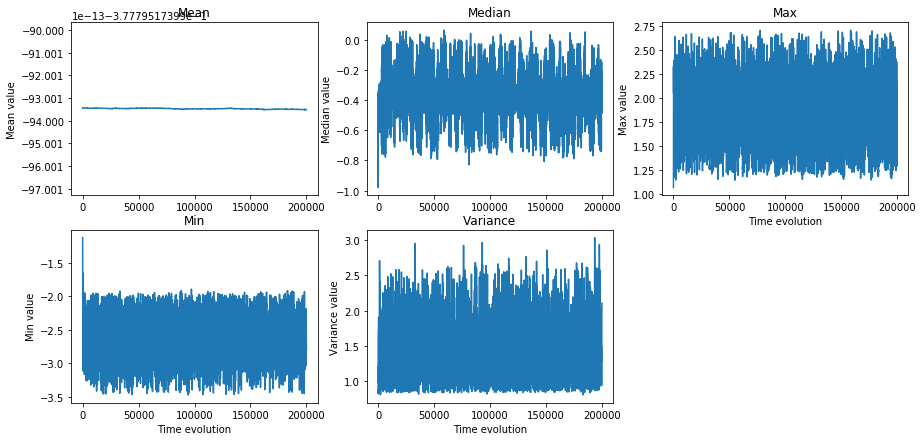

In [38]:
state_history = np.squeeze(np.asarray(state_history))

#visualizing the solution of KS equation
drawKS(state_history, position_x, time_counter,0,200000,20,4)


#histogram
plothist(state_history,bins=30)

#statistic values
statvalues(state_history[0,:])

#evolution of statistic values
evolutionstat(state_history)

Zoom to see the maximum peaks:

In [ ]:
print(state_history.shape)
print(np.max(state_history[4200:4300],axis=1))
n=4235
m=4000
plt.plot(state_history[n,:], label=n)
plt.plot(state_history[m,:], label=m)
plt.xlabel('Data Point')
plt.ylabel('Velocity')
plt.legend()

print(np.max(state_history,axis=1)[n])
print(np.max(state_history,axis=1)[m])

drawKS(state_history[4000:4300], position_x, time_counter[4000:4300],1,int(time_counter[-1]),20,4)